# Travel Insurance Company Dataset Analysis


## Description of Problem

The insurance companies insure their customers. These companies take a huge risk and to manage the risk, they evaluate many factors. The evaluation tells them what are the most and least affecting factors in terms of risks. This dataset contains various details about the policyholders and some features that could affect the risk. I will be using multiple methods to analyze this dataset and predict which factors should the insurance companies conisder while sanctioning the insurance policies. 

The header of the csv file is shown below. 

| ID | Age | Agency | Agency Type | Commission | Destination | Duration | Gender | Net_Sales | Product_Name | Claim |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
## Description of Fields

* __ID__ - the transaction id
* __Age__ - age of the insured person
* __Agency__ - the name of the agency
* __Agency_Type__ - the type of the agency
* __Commission__ - the commission recieved
* __Destination__ - the destination of the travel
* __Duration__ - the duration of the travel
* __Gender__ - gender of the insured
* __Net_Sales__ - the amount pertaining to the sales of the travel insurance, negative if the insurance was claimed
* __Product_Name__ - the type of insurance 
* __Claim__ - taken claim or not (0 means 'insurance NOT claimed'; 1 means 'insurance claimed')


## Procedure

The main focus of this dataset is to get to know what factors should the insurance company keep in mind before insuring the people. Various features that we have are duration, agency, agency type, gender etc., which affects our target class. Our target class is "Claim", which is a binary classified column which tells us whether the insurance has been claimed or not. Since, it is binary classification problem, we can do [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) first as our simple model and then follow it by two advanced models: [KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

## STEP 1: Importing the dataset in pandas dataframe form

In [2]:
df = pd.read_csv('files/claim_dataset.csv')
df.head(10)

,ID,Age,Agency,Agency_Type,Commission,Destination,Duration,Gender,Net_Sales,Product_Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,34,F,112.50,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,53,F,37.00,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,28,NaN,13.00,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,1,NaN,34.00,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,33,NaN,39.60,Rental Vehicle Excess Insurance,0
5,9279,39,CWT,Travel Agency,59.40,AUSTRALIA,78,NaN,99.00,Rental Vehicle Excess Insurance,0
6,6217,34,CWT,Travel Agency,23.76,AUSTRALIA,27,NaN,0.00,Rental Vehicle Excess Insurance,0
7,52027,45,JZI,Airlines,9.10,HONG KONG,10,M,26.00,Basic Plan,0
8,24167,32,C2B,Airlines,63.21,SINGAPORE,368,M,252.85,Annual Silver Plan,1
9,19885,59,C2B,Airlines,63.21,SINGAPORE,377,F,252.85,Annual Silver Plan,0


***


## STEP 2: Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            62288 non-null  int64  
 1   Age           62288 non-null  int64  
 2   Agency        62288 non-null  object 
 3   Agency_Type   62288 non-null  object 
 4   Commission    62288 non-null  float64
 5   Destination   62288 non-null  object 
 6   Duration      62288 non-null  int64  
 7   Gender        22713 non-null  object 
 8   Net_Sales     62288 non-null  float64
 9   Product_Name  62288 non-null  object 
 10  Claim         62288 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 5.2+ MB


In [4]:
# checking the number of null values

df.isnull().sum()

ID                  0
Age                 0
Agency              0
Agency_Type         0
Commission          0
Destination         0
Duration            0
Gender          39575
Net_Sales           0
Product_Name        0
Claim               0
dtype: int64

In [5]:
# checking for unique values in the dataframe

df.nunique()

ID              50756
Age                89
Agency             16
Agency_Type         2
Commission        940
Destination       102
Duration          443
Gender              2
Net_Sales        1037
Product_Name       25
Claim               2
dtype: int64

In [6]:
df.describe()

,ID,Age,Commission,Duration,Net_Sales,Claim
count,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000
mean,32844.953458,39.666324,12.829703,60.958804,50.717064,0.200006
std,18065.417216,14.014652,23.498745,114.325330,63.166715,0.400008
min,0.000000,0.000000,0.000000,-2.000000,-389.000000,0.000000
25%,17579.000000,33.000000,0.000000,10.000000,20.000000,0.000000
50%,33446.500000,36.000000,1.880000,25.000000,29.700000,0.000000
75%,48532.250000,43.000000,14.440000,59.000000,58.000000,0.000000
max,63323.000000,118.000000,262.760000,4881.000000,682.000000,1.000000


### Observations -
* There are 39,575 null values in the 'Gender' column.
* The minimum in 'Duration' is negative, which is not possible. Duration of the travel, in worst case, cannot be less than 0.
* The minimum in 'Net_Sales' is negative, which means that the insurance was claimed by the policyholder.
* Maximum in 'Age' is 118, which is vague, a person this old travels and is insured by the insurance company.
* Maximum in 'Duration' is 4,881, which is way too large for the duration of travel.


****

## STEP 3: Data Preparation - cleaning the dataset

In [7]:
# dropping the null values from the dataset

df = df.dropna()

In [8]:
# checking again if the dataset has any other missing or null values

df.isnull().sum()

ID              0
Age             0
Agency          0
Agency_Type     0
Commission      0
Destination     0
Duration        0
Gender          0
Net_Sales       0
Product_Name    0
Claim           0
dtype: int64

In [9]:
# setting the negative values in 'Duration' to 1, since minimum duration of any travel can be 0.

df['Duration'][df['Duration'] < 0] = df['Duration'].median()

In [10]:
df.describe()

,ID,Age,Commission,Duration,Net_Sales,Claim
count,22713.000000,22713.000000,22713.000000,22713.000000,22713.000000,22713.000000
mean,37917.044556,42.578920,23.043668,93.382204,76.835708,0.379959
std,16877.357473,19.096141,28.985619,135.866248,89.597138,0.485387
min,0.000000,0.000000,0.000000,0.000000,-389.000000,0.000000
25%,26512.000000,30.000000,6.880000,10.000000,22.500000,0.000000
50%,39695.000000,38.000000,11.210000,25.000000,35.000000,0.000000
75%,52386.000000,49.000000,24.000000,83.000000,81.500000,1.000000
max,63323.000000,118.000000,262.760000,740.000000,682.000000,1.000000


****

## STEP 4: Data Analysis - Checking for the distribution of the features and identifying        outliers

In [11]:
# plotting the non-categorical features, unique identifier("ID") and "Gender and Claim" (since they are binary classified columns) to check for outliers

df_plot = df.drop(['ID','Agency','Agency_Type','Destination', 'Product_Name', 'Claim'], axis = 1)

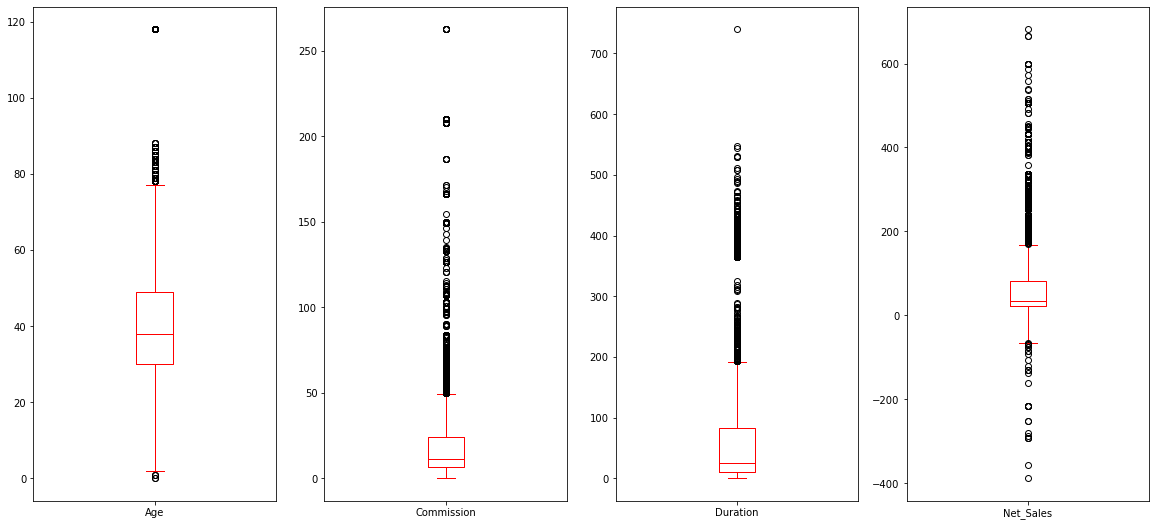

In [12]:
# plotting a box plot for each suitable numerical feature

df_plot.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,20),color='red')
plt.show()

In [13]:
# finding extreme values which will help us to remove outliers, using IQR 

# 1. AGE
# IQR
Q1 = np.percentile(df['Age'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = Q3+1.5*IQR
print("Age Upper bound:", upper)
print("Lower bound for Age is 0.")


#-----------------------------------------------

Age Upper bound: 77.5
Lower bound for Age is 0.


# NOTE: 
* Original formula for upper bound and lower bound involves multiplying IQR with 1.5, but here we will increase it to 2.5 since the data we have for Commission, Duration and Net_Sales, is slighlty right-skewed, this will increase the range and extend the upper and lower bound values.

* Original formula: 
    * $ upper bound = Q3 + (1.5 * IQR) $

    * $ lower bound = Q1 - (1.5 * IQR) $


* Modified formula: 
    * $ upper bound = Q3 + (2.5 * IQR) $

    * $ lower bound = Q1 - (2.5 * IQR) $


In [14]:

# 2. Commission
# IQR
Q1 = np.percentile(df['Commission'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Commission'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = Q3+2.5*IQR
print("\nCommission Upper bound:", upper)
print("Lower bound for Commission is 0.")


#-----------------------------------------------

# 3. Duration
# IQR
Q1 = np.percentile(df['Duration'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Duration'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = Q3+(2.5*IQR)
print("\nDuration Upper bound:", upper)
print("Lower bound for Duration is 0.")


#-----------------------------------------------

# 4. Net_Sales
# IQR
Q1 = np.percentile(df['Net_Sales'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Net_Sales'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = Q3+2.5*IQR
print("\nNet_Sales Upper bound:", upper)
# Lower bound
lower = Q1-2.5*IQR
print("Net_Sales Lower bound:", lower)


Commission Upper bound: 66.80000000000001
Lower bound for Commission is 0.

Duration Upper bound: 265.5
Lower bound for Duration is 0.

Net_Sales Upper bound: 229.0
Net_Sales Lower bound: -125.0


## STEP 5: Data Preparation - Removing the outliers and unappropriate features

#### We will remove records where:
* Age > 78
* Commission > 67
* Duration > 266
* Net_Sales > 229
* Net_Sales < -125


In [15]:
df_1 = df.drop(df.index[df["Age"]>78])
df_2 = df_1.drop(df_1.index[df_1["Commission"]>67])
df_3 = df_2.drop(df_2.index[df_2["Duration"]>266])
df_4 = df_3.drop(df_3.index[df_3["Net_Sales"]>229])
cleandata = df_4.drop(df_4.index[df_4["Net_Sales"]<(-125)])

In [16]:
cleandata.shape

(17560, 11)

In [17]:
cleandata.head(10)

,ID,Age,Agency,Agency_Type,Commission,Destination,Duration,Gender,Net_Sales,Product_Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,53,F,37.0,Basic Plan,0
7,52027,45,JZI,Airlines,9.10,HONG KONG,10,M,26.0,Basic Plan,0
10,61994,27,C2B,Airlines,5.00,SINGAPORE,9,M,20.0,Bronze Plan,0
13,42658,33,C2B,Airlines,17.25,SINGAPORE,27,M,69.0,Gold Plan,1
18,21920,47,JZI,Airlines,12.60,BAHRAIN,12,M,36.0,Basic Plan,0
19,27267,41,JZI,Airlines,23.45,NETHERLANDS,29,M,67.0,Value Plan,0
22,24367,43,JZI,Airlines,51.45,JAPAN,38,M,147.0,Value Plan,0
23,40883,35,JZI,Airlines,6.30,MALAYSIA,1,M,18.0,Basic Plan,0
29,30854,45,C2B,Airlines,4.25,SINGAPORE,61,F,17.0,Bronze Plan,0


In [18]:
# removing the 'ID' column since it is a unique identifier and won't be useful in our analysis

cleandata = cleandata.drop(['ID'], axis=1)

In [19]:
# Converting the categorical features to numerical feature using Ordinal Encoder

ord_enc = OrdinalEncoder(dtype=int)
cleandata[["Agency_code", "Agency_Type_code", "Destination_code", "Gender_code", "Product_Name_code"]] = ord_enc.fit_transform(cleandata[["Agency", "Agency_Type", "Destination", "Gender", "Product_Name"]])

cleandata = cleandata.drop(["Agency", "Agency_Type", "Destination", "Gender", "Product_Name"], axis=1)
cleandata.head(10)

,Age,Commission,Duration,Net_Sales,Claim,Agency_code,Agency_Type_code,Destination_code,Gender_code,Product_Name_code
0,28,28.13,34,112.5,1,2,0,56,0,7
1,37,12.95,53,37.0,0,7,0,50,0,1
7,45,9.10,10,26.0,0,7,0,22,1,1
10,27,5.00,9,20.0,0,2,0,56,1,2
13,33,17.25,27,69.0,1,2,0,56,1,4
18,47,12.60,12,36.0,0,7,0,3,1,1
19,41,23.45,29,67.0,0,7,0,44,1,12
22,43,51.45,38,147.0,0,7,0,30,1,12
23,35,6.30,1,18.0,0,7,0,36,1,1
29,45,4.25,61,17.0,0,2,0,56,0,2


In [20]:
cleandata.shape

(17560, 10)

### *NOTE:* 'cleandata' is a dataset that is free from all the null values and the outliers that might have affected the performance of our models . This encoded dataset, with 17560 rows and 10 columns, is ready for further analysis.

****

## STEP 6: Data Exploration on new dataset

In [21]:
# Checking the distribution of the our target class: Claim

cleandata.groupby('Claim').size()

Claim
0    11805
1     5755
dtype: int64

<AxesSubplot:xlabel='Claim', ylabel='count'>

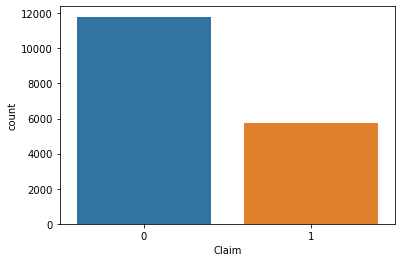

In [22]:
# Visualising countplot

sns.countplot(cleandata['Claim'], label="Count")

### Observations:
* Number of instances where insurance was NOT claimed = 11805
* Number of instances where insurance was claimed = 5755
* There is an imbalance in our target class i.e. the number of samples of each category(here, claimed and not claimed) are different.

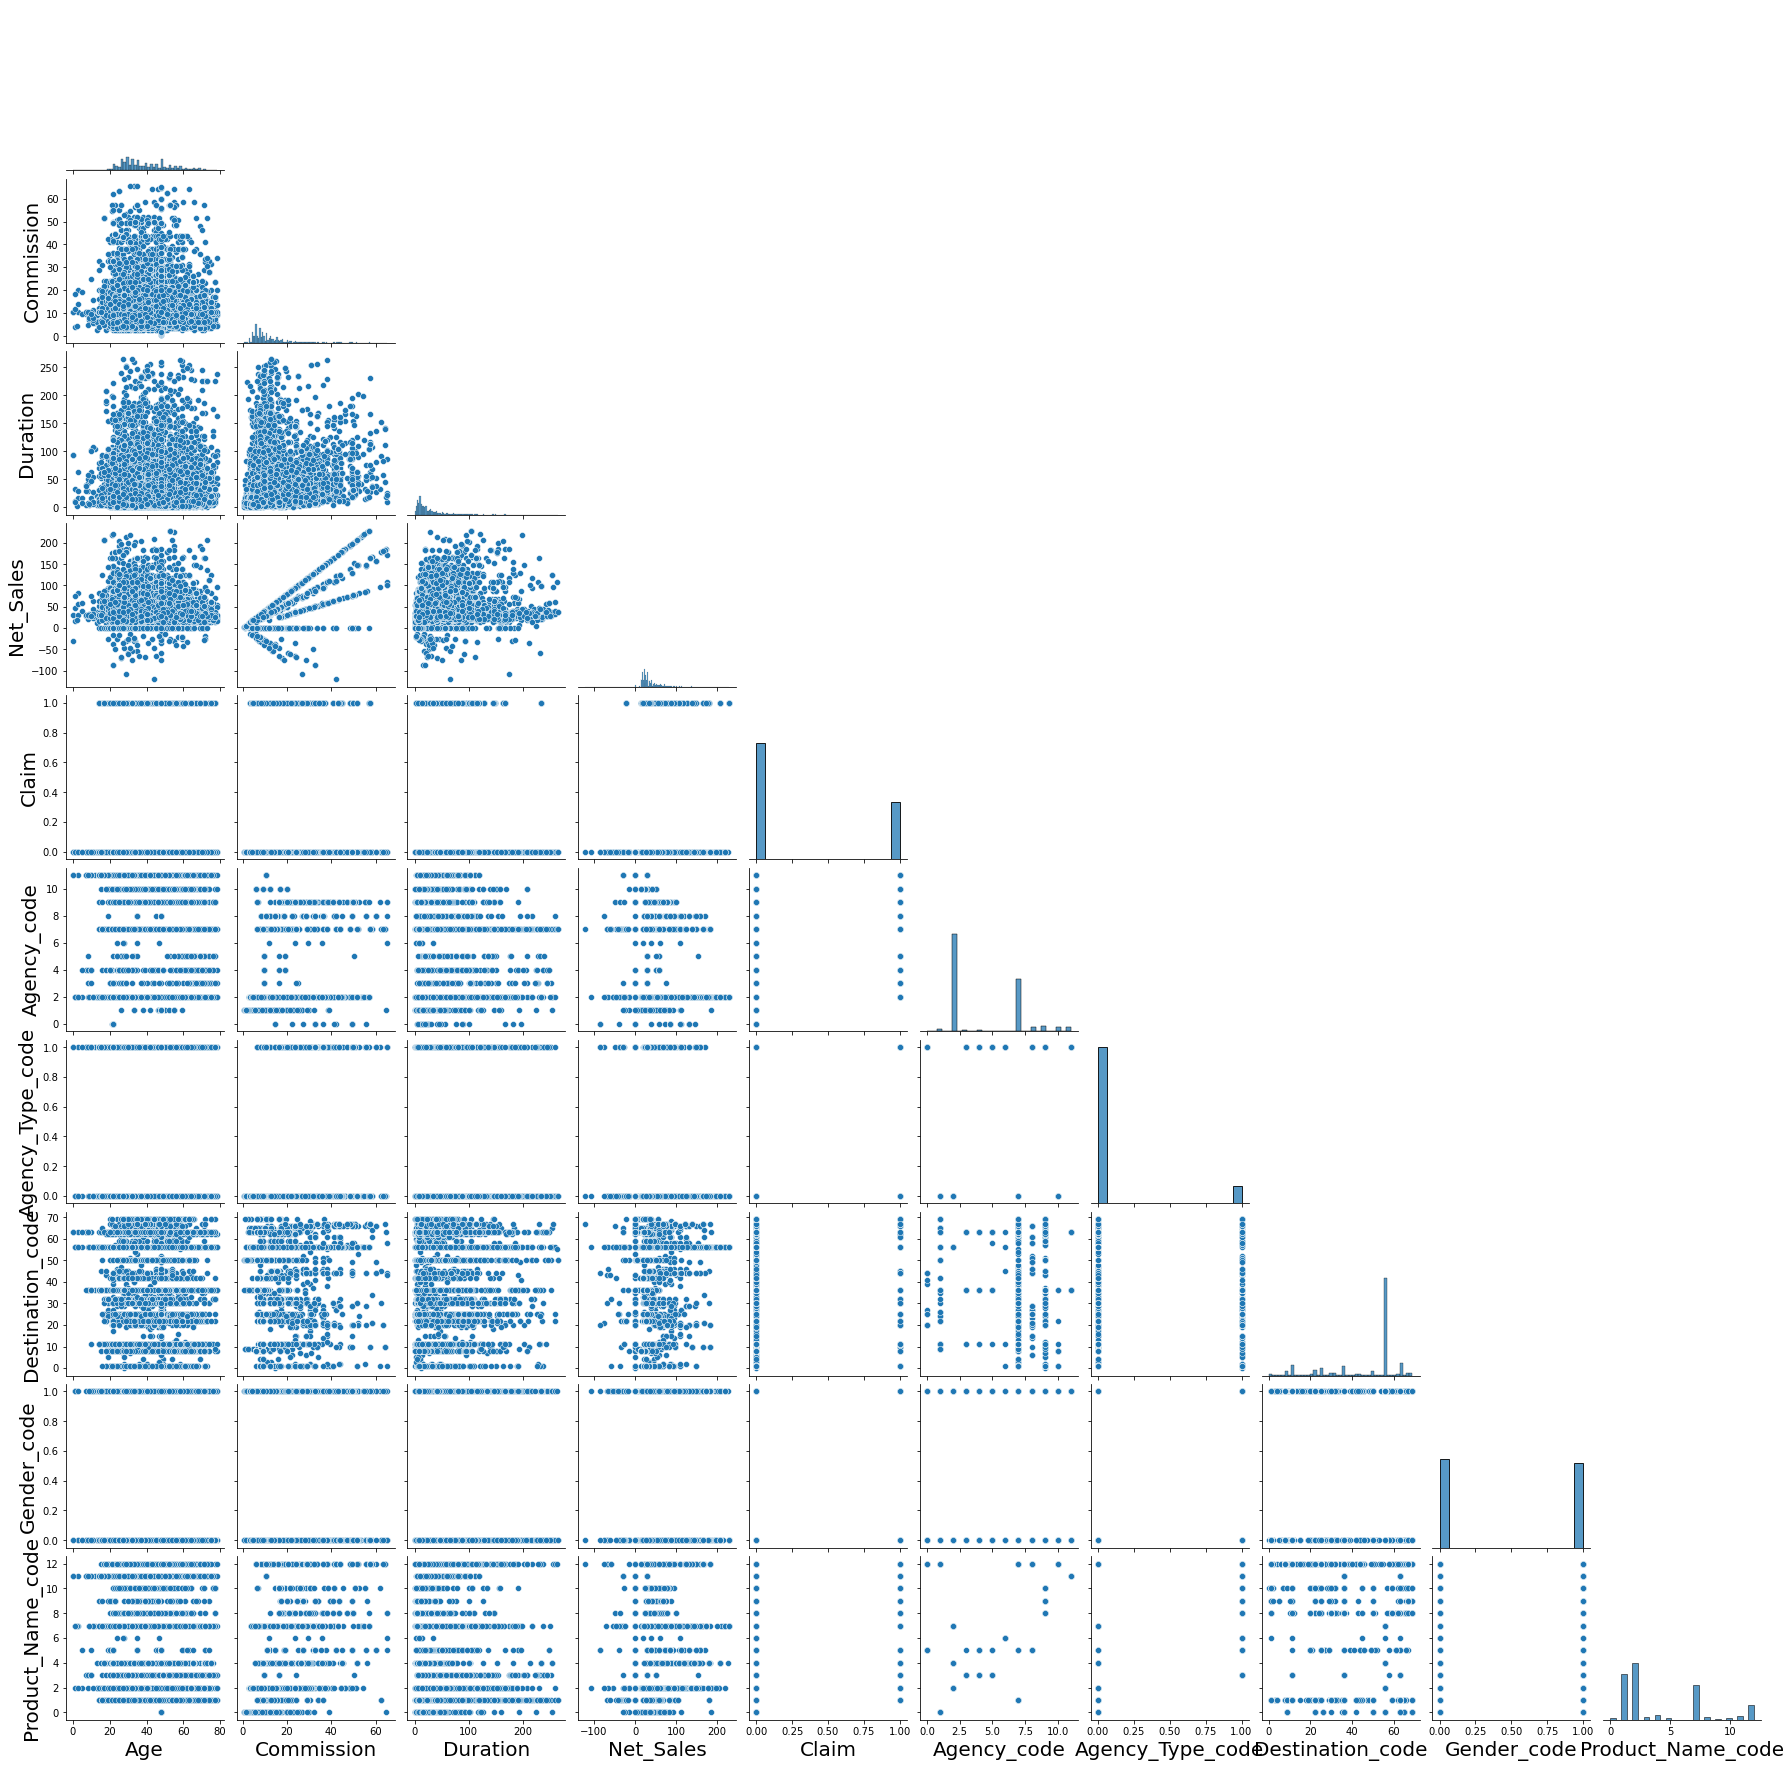

In [23]:
# Pairplot for clean dataset

with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(cleandata, corner=True)

<AxesSubplot:>

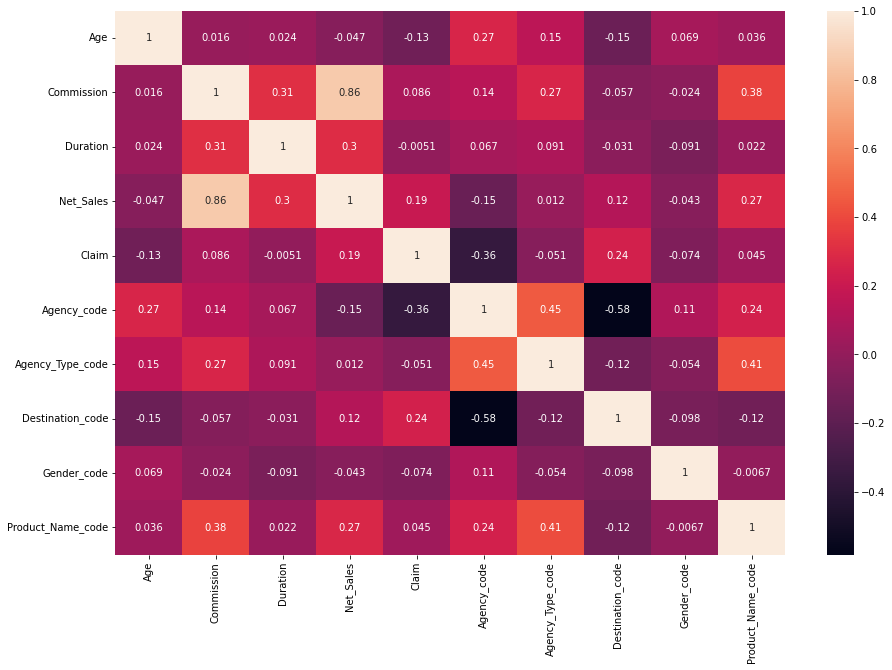

In [24]:
#Correlation plot 

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cleandata.corr(), annot=True, ax=ax)

### Observations:
* 1. Pairplot
    * There is a linear relationship between "Net_Sales" and "Commission".
    
* 2. Correlation Heatmap
    * Claim is having a low negative correlation with the Agency.
    * Other features have almost negligible correlation with Claim.
    * Destination and Agency seems to have medium negative correlation.
  

In [25]:
X = cleandata.drop('Claim', axis = 1)
Y = cleandata['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=142)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (13170, 9)
y_train shape: (13170,)
X_test shape: (4390, 9)
y_test shape: (4390,)


****

## STEP 7: SIMPLE MODEL: Logistic Regression Model

In [26]:
lr = LogisticRegression().fit(X_train, y_train)

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Accuracy on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Accuracy on test set: ", accuracy_score(y_test, y_pred_test))

Accuracy on training set:  0.6933181473044798
Accuracy on test set:  0.7002277904328018


In [27]:
# finding important features for our logistic model through RFE

rfe = RFE(lr, 4)
rfe_model = rfe.fit(X_train, y_train)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  4
Selected features:  [False False False False  True  True False  True  True]
Features ranking:  [4 5 6 2 1 1 3 1 1]


### Plotting a graph that depicts the highest accuracy score achievable while using a single feature column except the "Claim" feature from the dataframe. 

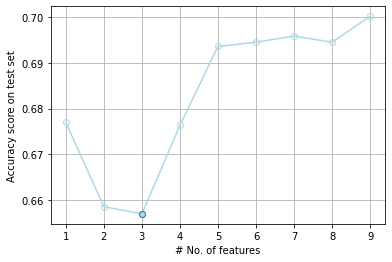

In [28]:
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

### Accuracy is best when we use 9 features, since we have used 9 features in the original logistics regression model, the accuracy score that we got is the best one that we can get even after feature selection.

****

## STEP 8: ADVANCE MODEL: KNN Classifier Model

In [29]:
# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [30]:
y_pred = clf_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is: %.4f\n" % accuracy)

Accuracy is: 0.9651



## Parameter tuning with cross validation (CV)

Scikit-learn comes in handy with its [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method.

**Manual tuning with cross validation**: Plotting the misclassification error versus $K$. We need to figure out the possible values of $K$. If the number of possible values is too big, we can take some values with a certain step, e.g., $K$ = 1, 5, 10, ... with a step of 5. 

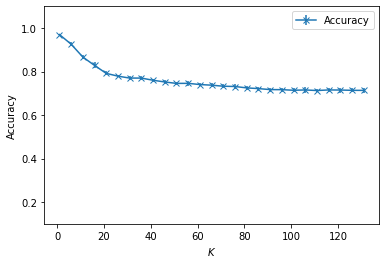

In [31]:
cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### It can be seen that the accuracy goes down when $K$ increases. It drops from 1 to 20. Then, there is a minimal change throughout. $K=1$ is the best $K$ to get the most accurate KNN Classifier Model.

****

## STEP 9: ADVANCE MODEL: Gaussian Naive Bayes  

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification on the data sets where features are continuous.   
The likelihood of the features is assumed to be Gaussian:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

The parameters $\sigma_y$ and $\mu_y$  are estimated using maximum likelihood.

#### NOTE: I was performing a Multinomial Naive Bayes which is more appropriate for discrete values, but since our data has some negative values in "Net_Sales" column, it showed some error. That's why, I have considered Gaussian Naive Bayes.

In [32]:
clf_gnb = GaussianNB()
clf_gnb.fit(X, Y)

GaussianNB()

In [33]:
y_pred = clf_gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: %.4f\n' % accuracy)

Accuracy is: 0.6583



****

## STEP 10: COMPARING OUR ADVANCED MODELS

In [34]:
clf_gnb = GaussianNB()
clf_knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(clf_gnb, X, Y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
scores_gnb = scores

scores = cross_val_score(clf_knn, X, Y, scoring='accuracy', cv=10)
print('KNN Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
scores_knn = scores

# This is to show t-test on their performances.
from scipy.stats import ttest_ind
t, p = ttest_ind(scores_gnb, scores_knn)
print ('t, p: %.4f, %.4f\n' % (t, p))

Gaussian Naive Bayes accuracy range: [0.6486, 0.6800]; mean: 0.6617; std: 0.0089

KNN Classifier accuracy range: [0.9664, 0.9755]; mean: 0.9711; std: 0.0029

t, p: -99.0807, 0.0000



****

## SUMMARY OF OUR ANALYSIS 

Our simple model, the logistic regression gave a less accuracy score. For our advanced models, the averaged accuracy of the K nearest neighbors classifier is higher than that of the Guassian Naive Bayes classifier. But in terms of t-test, the two performances of the two classifiers are statistically significantly different if we use the significance level 0.05, as the p value 0.0000 < 0.05 and such a small p-value is not enough for a *sound statistical analysis*.

***